In [8]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt

rc('text',usetex = True)
rc('font', family='serif')

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


In [9]:
workbook = xlrd.open_workbook('Planejamento das simulações - Modelo Analítico - NOVO.xlsx')
worksheet = workbook.sheet_by_name('Simulações_Modelo')

In [10]:
N = 58
R1 = array([])
R2 = array([])
R3 = array([])
R4 = array([])
B_rem = array([])
Pi1 = array([])
Pi2 = array([])
B = array([])
W = array([])
efic = array([])
for i in range(3,N):
    efic = append(efic, (worksheet.cell(i, 19).value))
    W = append(W, (worksheet.cell(i, 17).value))
    R1 = append(R1, float(worksheet.cell(i, 1).value))
    R2 = append(R2, float(worksheet.cell(i, 2).value))
    R3 = append(R3, float(worksheet.cell(i, 3).value))
    R4 = append(R4, float(worksheet.cell(i, 11).value))
    B_rem = append(B_rem,1.26)
    B = append(B, float(worksheet.cell(i, 4).value))

In [11]:
len (R1)

55

In [12]:
# definição de parâmetros importantes, como altura do gap, volume do gap e etc
h_gap = R3-R2
eta_vol = (B/B_rem)*((R3**2-R2**2)/(R4**2 - R3**2 + R2**2-20**2-R1**2))**0.5
V_in = R2**2 - R1**2
V_out = R4**2 - R3**2
V_t = R4**2 - R1**2
V_magnet = (R4**2 - R3**2)*pi*2/3
V_gap = (R3**2 - R2**2)*pi
T= (V_gap/V_magnet)


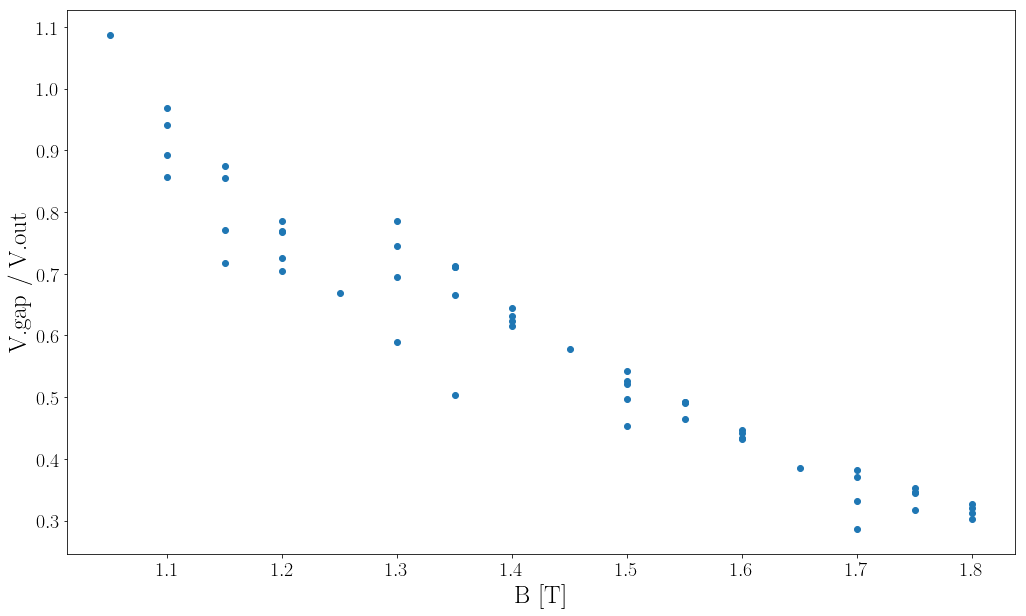

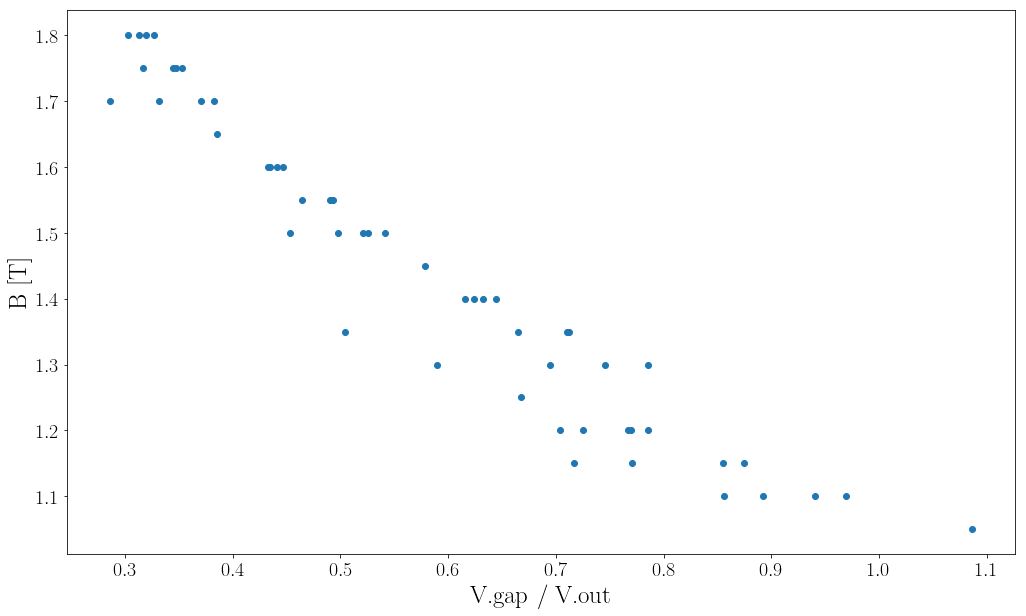

In [13]:
#plota B x V_gap / V_out (das simulações)
plt.plot(B,V_gap/V_out,'o')
plt.xlabel('B [T]',fontsize=25)
plt.ylabel('V.gap / V.out',fontsize=25)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 9)
plt.savefig('teste.png', format='png')
plt.rcParams['legend.fontsize'] = 18   
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17, 10)
plt.savefig('teste.png', format='png')
plt.show()
#plota V_gap/V_out x B (da simulação)
plt.plot(V_gap/V_out,B,'o')
plt.ylabel('B [T]',fontsize=25)
plt.xlabel('V.gap / V.out',fontsize=25)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.savefig('teste.png', format='png')
plt.rcParams['legend.fontsize'] = 18   
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17, 10)
plt.savefig('teste.png', format='png')
plt.show()

In [14]:
#define função para formato B=a*R2^b*R3^c*R4^d
def eta(X,a,c,d,e): 
    P2,P3,P4 = X
    return (a*(P2**c)*(P3**d)*(P4**e))
#. Faz o fitting dessa função, retornando R4.
M1 = curve_fit(eta,(R2,R3,B),R4)
print(M1[0])
# função para formato B=a*R2^b*R3^c*R4^d. Faz o fitting dessa função, retornando B.
M2 = curve_fit(eta,(R2,R3,R4),B)
print(M2[0])

#define função da forma B = a*(V_gap/V_out)^b
def eta2(X,a,e): 
    P2 = X
    #return (a*((np.log(P1**b))+(np.log(P2**c))+(np.log(P3**d))+(np.log(P4**e)))*(P5**f))
    return (a*(P2**e))
#Faz o fitting, entrando V_gap / V_magnet e retornando B
M3 = curve_fit(eta2,(T),B)
print(M3[0])

[ 1.21091228 -1.23399492  2.20035099  0.72281939]
[ 0.93377126  1.63850538 -2.87021294  1.25072182]
[ 0.81005262 -0.42150047]


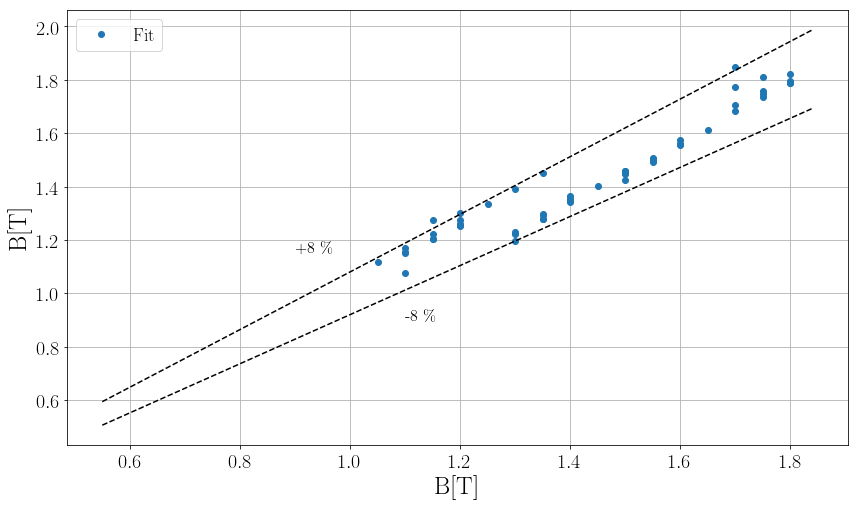

In [15]:
#plota o fitting M2 (que retorna B) pelo B simulado. Plota 2 retas indicando onde atingimos um erro de 8%
B_error = np.arange(0.55,1.85,0.01)
plt.plot(B,eta((R2,R3,R4),M2[0][0],M2[0][1],M2[0][2],M2[0][3]),'o',label  = 'Fit')
plt.plot(B_error,0.92*B_error,'k--')
plt.plot(B_error,1.08*B_error,'k--')
plt.grid()
plt.text(1.1, 0.9, '-8 $\%$', fontsize=16)
plt.text(0.9, 1.15, '+8 $\%$', fontsize=16)
plt.legend()
plt.savefig('MagnetFit1.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.ylabel('B[T]', fontsize = 25)
plt.xlabel('B[T]', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


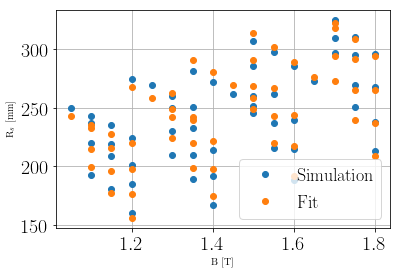

In [16]:
#plota R4 do fit (M1) e R4 simulado, dado certo B
plt.plot(B,R4,'o',label = 'Simulation')
plt.plot(B,eta((R2,R3,B),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.grid()
plt.legend()
plt.ylabel('R$_s$ [mm]')
plt.xlabel('B [T]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

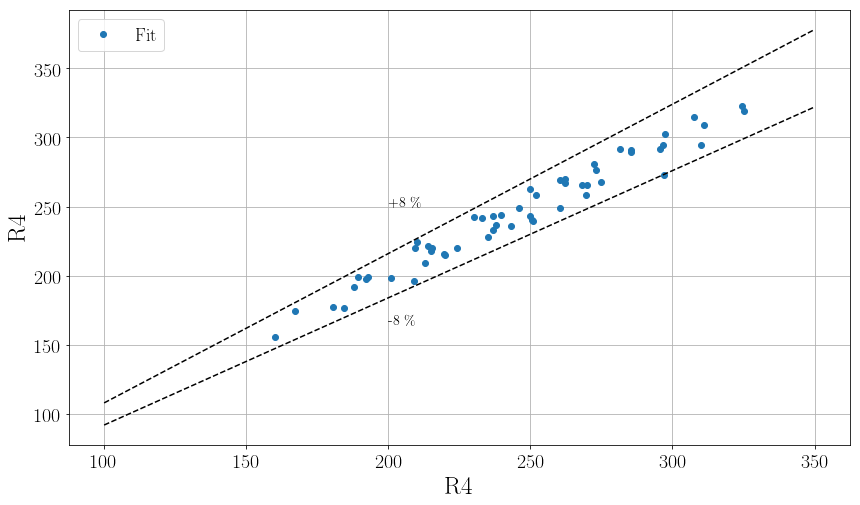

In [17]:
#plota o fitting M1 (que retorna R4) pelo R4 simulado. Plota 2 retas indicando onde atingimos um erro de 8%
R4_error = np.arange(100,350,0.1)
plt.plot(R4,eta((R2,R3,B),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.plot(R4_error,0.92*R4_error,'k--')
plt.plot(R4_error,1.08*R4_error,'k--')
plt.grid()
plt.text(200, 250, '+8 $\%$', fontsize=14)
plt.text(200, 165, '-8 $\%$', fontsize=14)
plt.legend()
plt.xlabel('R4 ',fontsize = 25)
plt.ylabel('R4 ',fontsize = 25)
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

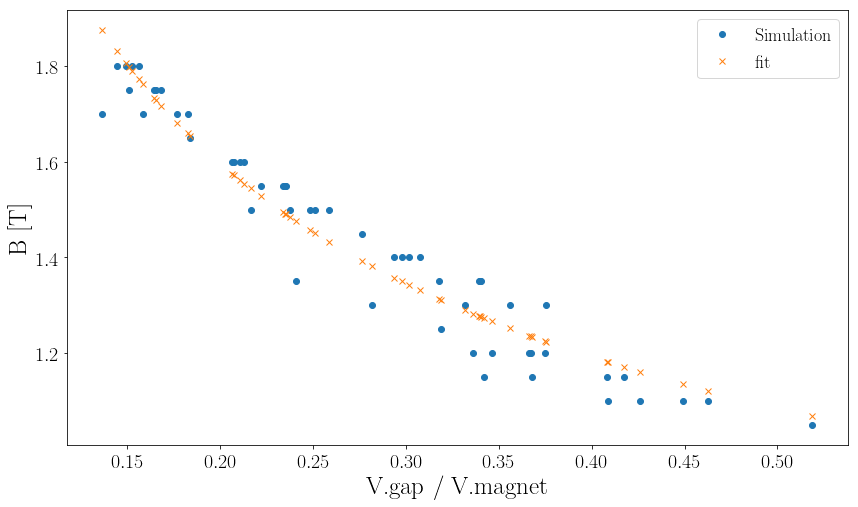

In [18]:
#plota V_gap/V_magnet simulado x B simulado, e plota o fitting da mesma relação
plt.plot(T,B,'o',label = 'Simulation')
plt.plot(T,eta2((T),M3[0][0],M3[0][1]),'x', label='fit')
plt.legend()
plt.xlabel('V.gap / V.magnet',fontsize = 25)
plt.ylabel('B [T]',fontsize = 25)
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.rcParams['legend.fontsize'] = 21
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

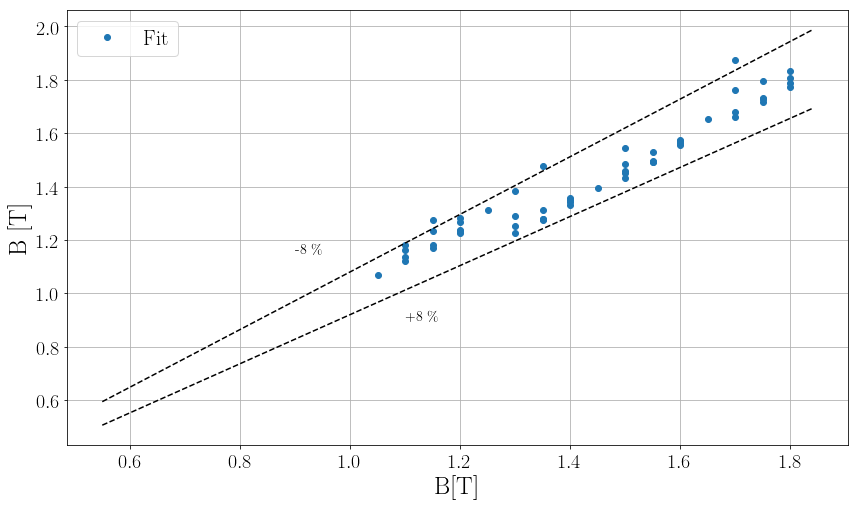

In [19]:
#plota o fitting M3 (que retorna B) pelo B simulado. Plota 2 retas indicando onde atingimos um erro de 8%
B_error = np.arange(0.55,1.85,0.01)
plt.plot(B,eta2((V_gap / V_magnet),M3[0][0],M3[0][1]),'o',label  = 'Fit')
plt.plot(B_error,0.92*B_error,'k--')
plt.plot(B_error,1.08*B_error,'k--')
plt.grid()
plt.text(1.1, 0.9, '+8 $\%$', fontsize=14)
plt.text(0.9, 1.15, '-8 $\%$', fontsize=14)

plt.legend()
plt.xlabel('B[T]',fontsize = 25)
plt.ylabel('B [T]',fontsize = 25)
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

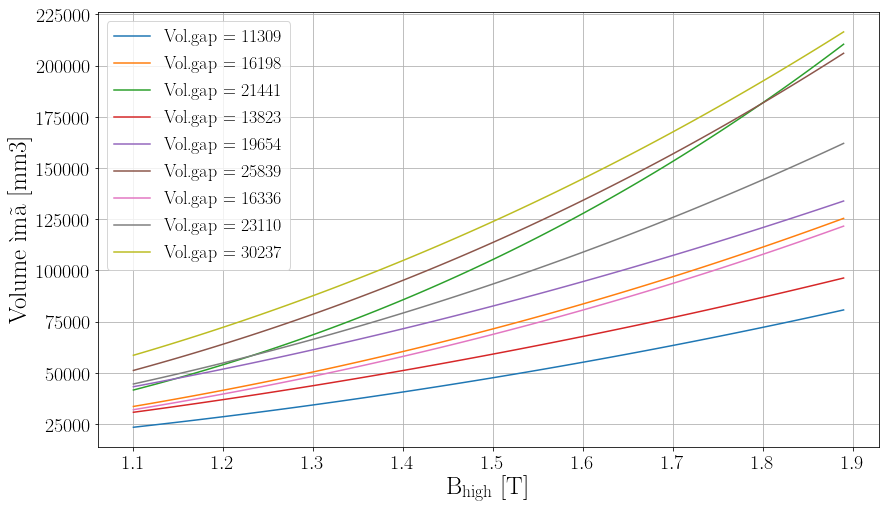

In [20]:
#traçar gráfico V_magnet x B_high para difererentes volumes de gap
V_magnet = (R4**2 - R3**2)*pi*2/3
V_gap = (R3**2 - R2**2)*pi
for i in range(0,34,4):
    '''if int(V_gap[i]) == 21441 or int(V_gap[i]) == 30237 or int(V_gap[i]) == 16198 or int(V_gap[i]) == 19654:
        continue'''
    M = curve_fit(eta2,B[i:i+4],V_magnet[i:i+4])
    plt.plot(arange(1.1,1.9,0.01),eta2(arange(1.1,1.9,0.01),M[0][0],M[0][1]), label = 'Vol.gap = {}'.format(int(V_gap[i])))
for i in range(34,34,4):
    '''if int(V_gap[i]) == 21441 or int(V_gap[i]) == 30237 or int(V_gap[i]) == 16198 or int(V_gap[i]) == 19654:
        continue'''
    M = curve_fit(eta2,B[i:i+4],V_magnet[i:i+4])
    plt.plot(arange(1.1,1.9,0.01),eta2(arange(1.1,1.9,0.01),M[0][0],M[0][1]), label = 'Vol.gap = {}'.format(int(V_gap[i])))
 
plt.grid()
plt.legend()
plt.ylabel('Volume ìmã [mm3]', fontsize = 25)
plt.xlabel('B$_\mathrm{high}$ [T]', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18   

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.savefig('teste.png', format='png')

In [21]:
print (V_gap)
for i in range(0,34,4):
    print (V_gap[i])
for i in range(34,50,5):
    print (V_gap[i])
print (len(V_gap))

[11309.73355292 11309.73355292 11309.73355292 11309.73355292
 16198.83712007 16198.83712007 16198.83712007 16198.83712007
 21441.36986075 21441.36986075 21441.36986075 21441.36986075
 13823.0076758  13823.0076758  13823.0076758  13823.0076758
 19654.58903902 19654.58903902 19654.58903902 19654.58903902
 25839.59957578 25839.59957578 25839.59957578 25839.59957578
 16336.28179867 16336.28179867 16336.28179867 16336.28179867
 23110.34095797 23110.34095797 23110.34095797 23110.34095797
 30237.8292908  30237.8292908  30237.8292908  30237.8292908
 18849.55592154 18849.55592154 18849.55592154 18849.55592154
 18849.55592154 23954.64398362 23954.64398362 23954.64398362
 23954.64398362 23954.64398362 29216.81167839 29216.81167839
 29216.81167839 29216.81167839 29216.81167839 34636.05900583
 34636.05900583 34636.05900583 34636.05900583]
11309.733552923255
16198.83712007237
21441.36986075034
13823.00767579509
19654.589039021143
25839.59957577605
16336.281798666923
23110.340957969915
30237.82929080

[20.  20.  20.  20.  27.5]
[160.  167.  188.  213.  180.5]
[27.5 27.5 27.5 27.5 35. ]
[180.5 189.5 215.5 250.5 193. ]
[35. 35. 35. 35. 20.]
[193.  210.  246.  297.  184.5]
[20.  20.  20.  20.  27.5]
[184.5 192.  215.  238.  209. ]
[27.5 27.5 27.5 27.5 35. ]
[209.  209.5 237.  270.  220. ]
[35. 35. 35. 35. 20.]
[220.  230.  260.5 310.  201. ]
[20.  20.  20.  20.  27.5]
[201.  214.  239.5 268.  219.5]
[27.5 27.5 27.5 27.5 35. ]
[219.5 233.  262.  295.5 237. ]
[35. 35. 35. 35. 20.]
[237.  250.  285.5 325.  224. ]
[20. 20. 20. 20. 20.]
[224.  251.  252.  273.  296.5]
[20. 25. 25. 25. 25.]
[296.5 235.  260.5 262.  285.5]
[25. 25. 30. 30. 30.]
[285.5 311.  243.  269.5 272.5]
[30. 30. 30. 35. 35.]
[272.5 297.5 324.5 250.  275. ]
[35. 35. 35.]
[275.  281.5 307.5]


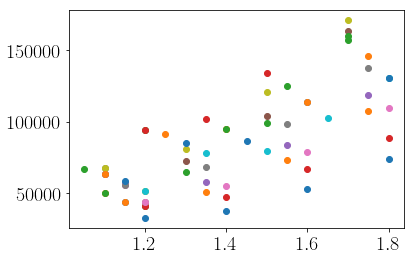

In [22]:
for i in range(0,54,4):
    print (h_gap[i:i+5])
    print (R4[i:i+5])
    plt.plot(B[i:i+5],V_magnet[i:i+5],'o') 

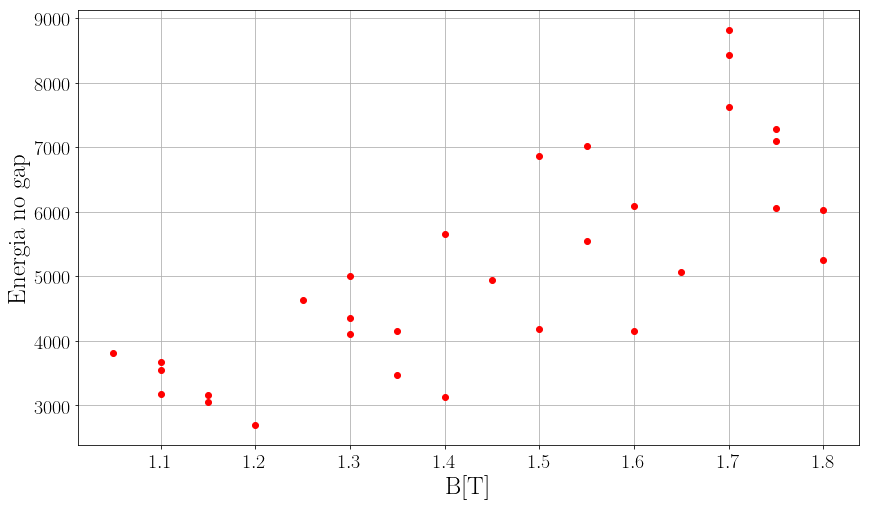

In [23]:
#plota a energia no gap pelo campo neste
h_gap = R3-R2
for i in range(0,52):
    if W[i] == '':
        continue
    else:
        plt.plot(B[i],float(W[i]),'ro')
    plt.grid()
plt.rcParams['legend.fontsize'] = 18   

fig = matplotlib.pyplot.gcf()
plt.savefig('teste.png', format='png')

plt.xlabel('B[T]', fontsize = 25)
plt.ylabel('Energia no gap', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18   
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.savefig('teste.png', format='png')

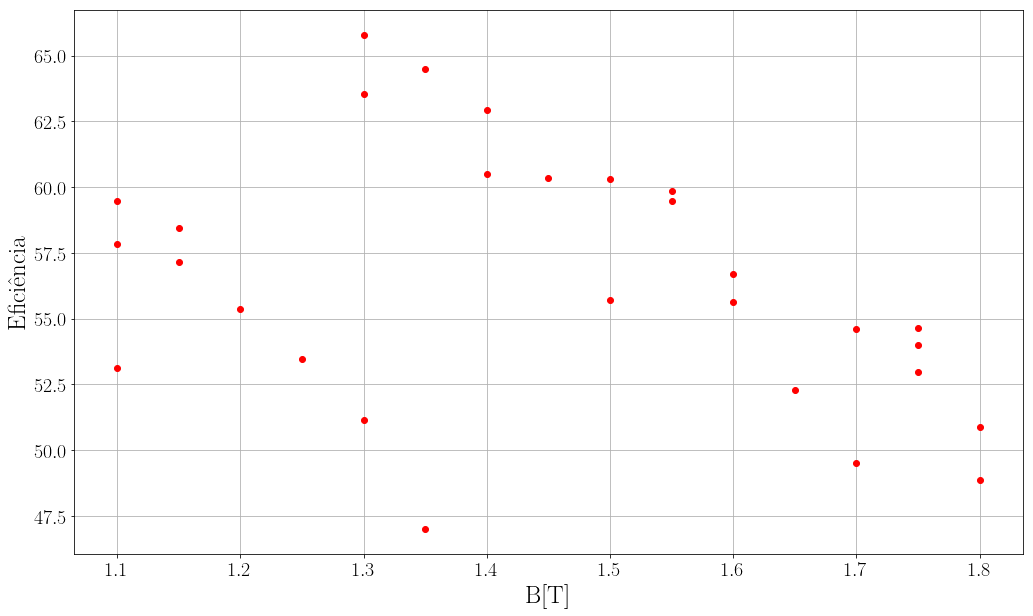

In [24]:
#plota a eficiência do ímã x o campo gerado
for i in range(0,50):
    if efic[i]==0:
        continue
    else:
        plt.plot(B[i],efic[i]*100,'ro')
    plt.grid() 
    
plt.xlabel('B[T]', fontsize = 25)
plt.ylabel('Eficiência', fontsize = 25)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 9)
plt.savefig('teste.png', format='png')
plt.rcParams['legend.fontsize'] = 18   
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17, 10)
plt.savefig('teste.png', format='png')

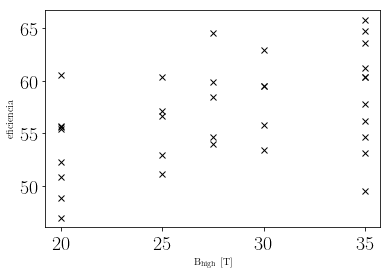

In [25]:
T= R3-R2
for i in range(55):
    if efic[i]==0:
        continue
    else:
        plt.plot(T[i],efic[i]*100,'kx')
        plt.grid()
        plt.ylabel('eficiencia')
        plt.xlabel('B$_\mathrm{high}$ [T]')

In [26]:
len(efic)

55